# Markov Chain Assignment

This notebook explores a simple Markov Chain model through code, analysis, and visualization.

## Introduction

A Markov chain is a mathematical model that describes a system that transitions from one state to another within a finite or countable number of possible states. The key property is that the probability of transitioning to the next state depends **only on the current state**, not the sequence of events that preceded it.

In this notebook:
- We define a Markov chain where each state has an 80% chance of progressing to the next state and a 20% chance of returning to state 0.
- The last state is an absorbing state.
- We analyze the transition matrix, simulate the chain, visualize distributions and compare theoretical vs empirical results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1 – Transition Matrix

In [3]:
def transition_matrix(n):
    T = np.zeros((n, n))
    T[0, :-1] = 0.2
    T[range(1, n), range(n-1)] = 0.8
    T[n-1, n-1] = 1.0
    return T

# Test
tm = transition_matrix(10)
print(tm)

[[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0. ]
 [0.8 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.8 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.8 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.8 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.8 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.8 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.8 1. ]]


## Question 2 – Propagate State Distribution

In [4]:
def propagate(p0, k, tm):
    p = p0.copy()
    for _ in range(k):
        p = tm @ p
    return p

# Test
p0 = np.zeros(10)
p0[0] = 1
pk = propagate(p0, 30, tm)
print(pk)

[0.0816156  0.06787354 0.05644353 0.04694437 0.03904617 0.03247669
 0.02701094 0.02246264 0.01867741 0.6074491 ]


## Question 3 – Plot First 10 Steps Distribution

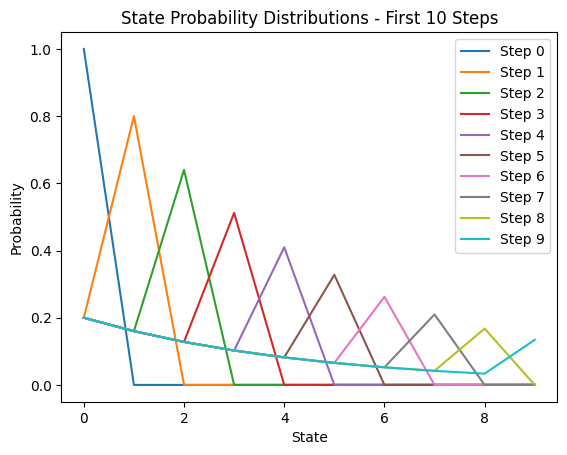

In [5]:
p0 = np.zeros(10)
p0[0] = 1
for k in range(10):
    pk = propagate(p0, k, tm)
    plt.plot(range(10), pk, label=f"Step {k}")
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("State Probability Distributions - First 10 Steps")
plt.legend()
plt.savefig("qsn3.png")
plt.show()

## Question 4 – Time to Reach ≥ 50% in Final State

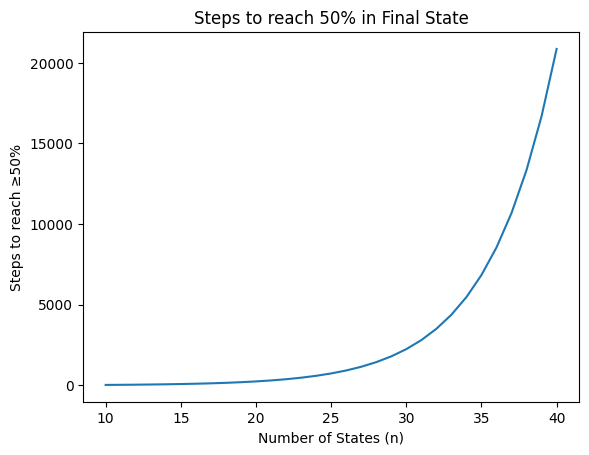

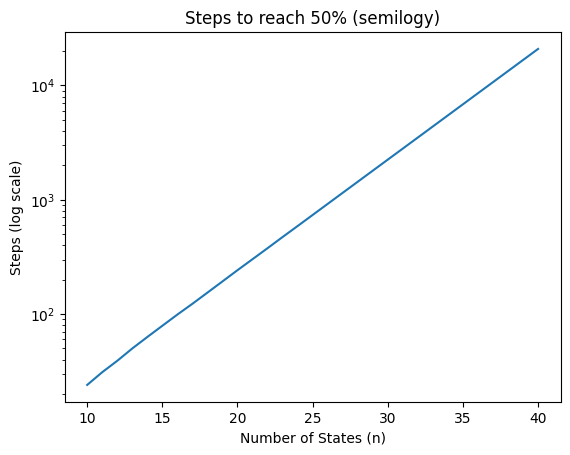

In [6]:
def num_steps(n):
    tm = transition_matrix(n)
    p = np.zeros(n)
    p[0] = 1
    k = 0
    while True:
        p = tm @ p
        k += 1
        if p[-1] >= 0.5:
            return k

# Plot from n=10 to 40
ns = list(range(10, 41))
steps = [num_steps(n) for n in ns]
plt.plot(ns, steps)
plt.xlabel("Number of States (n)")
plt.ylabel("Steps to reach ≥50%")
plt.title("Steps to reach 50% in Final State")
plt.savefig("qsn4c.png")
plt.show()

plt.semilogy(ns, steps)
plt.xlabel("Number of States (n)")
plt.ylabel("Steps (log scale)")
plt.title("Steps to reach 50% (semilogy)")
plt.savefig("qsn4c_semilogy.png")
plt.show()

## Question 5 – Sample Random Trajectories

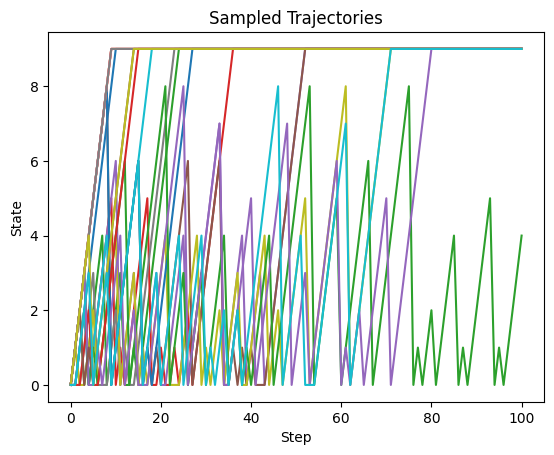

In [7]:
import numpy.random as rnd

def sample(tm, k, s0):
    states = [s0]
    current = s0
    for _ in range(k):
        current = rnd.choice(len(tm), p=tm[:, current])
        states.append(current)
    return states

for _ in range(20):
    states = sample(tm, 100, 0)
    plt.plot(states)
plt.title("Sampled Trajectories")
plt.xlabel("Step")
plt.ylabel("State")
plt.savefig("qsn5.png")
plt.show()

## Question 6 – Average State Over Time

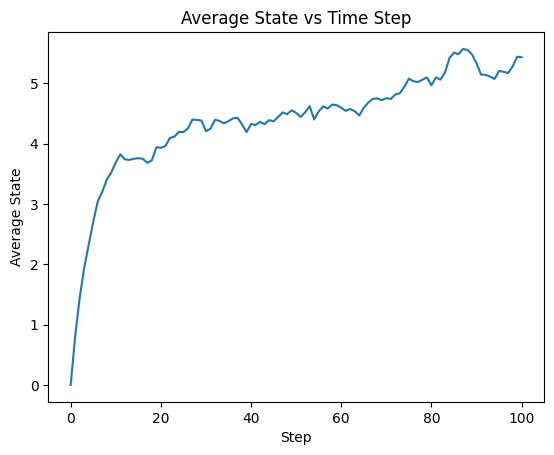

In [8]:
n = 25
tm = transition_matrix(n)
samples = np.zeros((1000, 101))
for i in range(1000):
    samples[i] = sample(tm, 100, 0)
avg_state = samples.mean(axis=0)
plt.plot(avg_state)
plt.title("Average State vs Time Step")
plt.xlabel("Step")
plt.ylabel("Average State")
plt.savefig("qsn6.png")
plt.show()

## Question 7 – Compare Sampling vs Theoretical Distribution

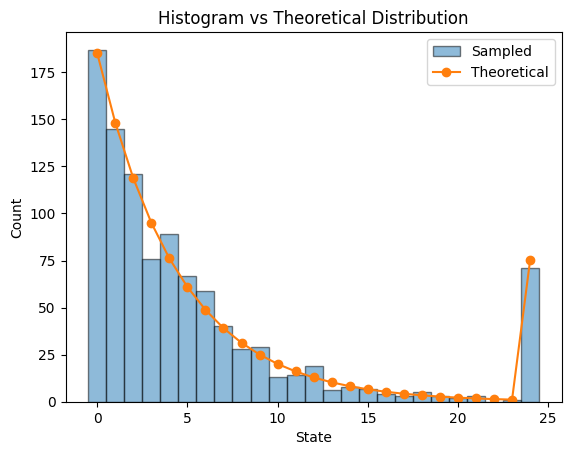

In [9]:
n = 25
tm = transition_matrix(n)
final_states = [sample(tm, 100, 0)[-1] for _ in range(1000)]
bins = np.arange(n+1) - 0.5
plt.hist(final_states, bins=bins, alpha=0.5, label="Sampled", edgecolor="black")
p0 = np.zeros(n)
p0[0] = 1
pk = propagate(p0, 100, tm)
plt.plot(range(n), pk * 1000, label="Theoretical", marker='o')
plt.title("Histogram vs Theoretical Distribution")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend()
plt.savefig("qsn7.png")
plt.show()